# Task 1: Build Database

## 1.1 Import packages and connected to database

In [195]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt


In [196]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import json
import sqlalchemy

credentials = "Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+'/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(sqlcmd, conn, params=args)
        else:
            result = conn.execute(sqlcmd, args.execution_options(autocommit=True)).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

In [200]:
db, conn = pgconnect(credentials)

Connected successfully.


## 1.2 Import Datasets

### Provided data 

1.2.1 Import CSV files

In [201]:
dfneighbour = pd.read_csv("Neighbourhoods.csv",index_col = [0])
print(dfneighbour.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_id                         322 non-null    int64  
 1   area_name                       322 non-null    object 
 2   land_area                       322 non-null    float64
 3   population                      321 non-null    object 
 4   number_of_dwellings             322 non-null    object 
 5   number_of_businesses            319 non-null    float64
 6   median_annual_household_income  314 non-null    float64
 7   avg_monthly_rent                310 non-null    float64
 8   0-4                             322 non-null    int64  
 9   5-9                             322 non-null    int64  
 10  10-14                           322 non-null    int64  
 11  15-19                           322 non-null    int64  
dtypes: float64(4), int64(5), object(3)
m

In [202]:
dfbusiness = pd.read_csv("BusinessStats.csv")
print(dfbusiness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   area_id                            2301 non-null   int64 
 1   area_name                          2301 non-null   object
 2   number_of_businesses               2301 non-null   int64 
 3   accommodation_and_food_services    2301 non-null   int64 
 4   retail_trade                       2301 non-null   int64 
 5   agriculture_forestry_and_fishing   2301 non-null   int64 
 6   health_care_and_social_assistance  2301 non-null   int64 
 7   public_administration_and_safety   2301 non-null   int64 
 8   transport_postal_and_warehousing   2301 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 161.9+ KB
None


1.2.2 Import Shape files

In [203]:
catchments = gpd.read_file("catchments_future.shp")
print(catchments.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USE_ID      44 non-null     object  
 1   CATCH_TYPE  44 non-null     object  
 2   USE_DESC    44 non-null     object  
 3   ADD_DATE    44 non-null     object  
 4   KINDERGART  44 non-null     int64   
 5   YEAR1       44 non-null     int64   
 6   YEAR2       44 non-null     int64   
 7   YEAR3       44 non-null     int64   
 8   YEAR4       44 non-null     int64   
 9   YEAR5       44 non-null     int64   
 10  YEAR6       44 non-null     int64   
 11  YEAR7       44 non-null     int64   
 12  YEAR8       44 non-null     int64   
 13  YEAR9       44 non-null     int64   
 14  YEAR10      44 non-null     int64   
 15  YEAR11      44 non-null     int64   
 16  YEAR12      44 non-null     int64   
 17  geometry    44 non-null     geometry
dtypes: geometry(1), int64(13), object(4)
memory 

In [204]:
sa2 = gpd.read_file("SA2_2016_AUST.shp")
print(sa2.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  2310 non-null   object  
 1   SA2_5DIG16  2310 non-null   object  
 2   SA2_NAME16  2310 non-null   object  
 3   SA3_CODE16  2310 non-null   object  
 4   SA3_NAME16  2310 non-null   object  
 5   SA4_CODE16  2310 non-null   object  
 6   SA4_NAME16  2310 non-null   object  
 7   GCC_CODE16  2310 non-null   object  
 8   GCC_NAME16  2310 non-null   object  
 9   STE_CODE16  2310 non-null   object  
 10  STE_NAME16  2310 non-null   object  
 11  AREASQKM16  2310 non-null   float64 
 12  geometry    2292 non-null   geometry
dtypes: float64(1), geometry(1), object(11)
memory usage: 234.7+ KB
None


In [205]:
crime = gpd.read_file("BreakEnterDwelling_JanToDec2021.shp")
print(crime.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2594 non-null   int64   
 1   Contour     2594 non-null   float64 
 2   Density     2594 non-null   object  
 3   ORIG_FID    2594 non-null   int64   
 4   Shape_Leng  2594 non-null   float64 
 5   Shape_Area  2594 non-null   float64 
 6   geometry    2594 non-null   geometry
dtypes: float64(3), geometry(1), int64(2), object(1)
memory usage: 142.0+ KB
None


### Extra data from City of Sydney data hub

1.2.3 Import extra geojson data

In [206]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
dfmobilityparking = gpd.read_file('Mobility_parking (1).geojson')
print(dfmobilityparking.info())
dfmobilityparking['geom'] = dfmobilityparking['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
dfmobilityparking = dfmobilityparking.drop(columns = 'geometry')
dfmobilityparking  = dfmobilityparking.rename(columns = str.lower)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             202 non-null    int64   
 1   SiteID               201 non-null    object  
 2   Address              186 non-null    object  
 3   Street               202 non-null    object  
 4   Location             202 non-null    object  
 5   Suburb               202 non-null    object  
 6   SideOfStreet         202 non-null    object  
 7   NumberParkingSpaces  202 non-null    int64   
 8   ParkingSpaceWidth    199 non-null    float64 
 9   ParkingSpaceLength   199 non-null    float64 
 10  ParkingSpaceAngle    202 non-null    object  
 11  SignText             32 non-null     object  
 12  URL                  202 non-null    object  
 13  AuditDate            201 non-null    object  
 14  geometry             202 non-null    geometry
dtypes: float64(2), 

In [207]:
dfparking = gpd.read_file('Parking_meters.geojson')
print(dfparking.info())
dfparking['geom'] = dfparking['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
dfparking = dfparking.drop(columns = 'geometry')
dfparking = dfparking.rename(columns = str.lower)
dfparking = dfparking[['objectid','meter_id',
                       'location_id','status_id','coinpaymentaccepted',
                       'phonepaymentaccepted','creditcardpaymentaccepted','street','suburb',
                       'approxpayspaces','geom']]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   1377 non-null   int64   
 1   Meter_ID                   1377 non-null   int64   
 2   Location_ID                1377 non-null   object  
 3   Status_ID                  1377 non-null   int64   
 4   CoinPaymentAccepted        1377 non-null   object  
 5   PhonePaymentAccepted       1377 non-null   object  
 6   CreditCardPaymentAccepted  1377 non-null   object  
 7   Street                     1377 non-null   object  
 8   Suburb                     1377 non-null   object  
 9   ApproxPaySpaces            1377 non-null   int64   
 10  Popup                      1377 non-null   object  
 11  geometry                   1377 non-null   geometry
dtypes: geometry(1), int64(4), object(7)
memory usage: 129.2+ KB
None


In [208]:
dfparking 

,objectid,meter_id,location_id,status_id,coinpaymentaccepted,phonepaymentaccepted,creditcardpaymentaccepted,street,suburb,approxpayspaces,geom
0,1,13880,02MAR51,1,Coins,Phone,Credit Card,Margaret Street,Sydney,3,POINT (151.2067433671296 -33.86500973648068)
1,2,20967,42RED01,1,Coins,Phone,Credit Card,Redfern Street,Redfern,5,POINT (151.2028888685286 -33.89270579483993)
2,3,13790,02WYN57,1,Coins,Phone,Credit Card,Wynyard Street,Sydney,2,POINT (151.206094487671 -33.86711818106422)
3,4,15231,13MAC49,1,Coins,Phone,Credit Card,Macarthur Street,Ultimo,6,POINT (151.1988428969282 -33.87967738577849)
4,5,19381,25CRO06,1,Coins,Phone,Credit Card,Crown Street,Surry Hills,6,POINT (151.2146115578556 -33.88161365701075)
...,...,...,...,...,...,...,...,...,...,...,...
1372,3207,30198,49POR02,1,Coins,Phone,Credit Card,Portman Street,ZETLAND,7,POINT (151.2056272449574 -33.90866062029718)
1373,3605,30197,49POR01,1,Coins,Phone,Credit Card,Portman Street,ZETLAND,6,POINT (151.2051766536962 -33.90951295702913)
1374,3606,30199,49POR03,1,Coins,Phone,Credit Card,Portman Street,ZETLAND,7,POINT (151.205775575141 -33.9088335445343)
1375,4005,30200,49ZET03,1,Coins,Phone,Credit Card,Zetland Avenue,ZETLAND,6,POINT (151.2055807685825 -33.90761679273403)


## 1.2 Data Cleaning

1.2.1 Neighbourhoods data set cleaning

In [209]:
# Define a function to unify the format of number and convert the type to float
def convert_currency(value):
    new_value = value.replace(',','')
    return np.float(new_value)

In [210]:
# Drop the NAs 
dfneighbour.loc[dfneighbour.isnull().all(axis = 1)]
dfneighbour.dropna()
dfneighbour.head()
for col in dfneighbour.columns:
    dfneighbour[col].replace('', np.nan, inplace=True)

dsneighbour = dfneighbour.dropna() 

# Casting the area_id type from int to object
dsneighbour['area_id'] =dsneighbour['area_id'].astype('object')

# drop the ',' in the records in "population" column and "number_of_dwellings" column in Neighbourhoods table
# unify the format and convert it to float
dsneighbour['population'] = dsneighbour['population'].apply(convert_currency)
dsneighbour['number_of_dwellings'] = dsneighbour['number_of_dwellings'].apply(convert_currency)

/opt/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

1.2.2 Business Stats Table cleaning

In [211]:
# Casting the data type of 'area_id' to object in Business_stats table
dfbusiness['area_id'] =dfbusiness['area_id'].astype('object')
dfbusiness

,area_id,area_name,number_of_businesses,accommodation_and_food_services,retail_trade,agriculture_forestry_and_fishing,health_care_and_social_assistance,public_administration_and_safety,transport_postal_and_warehousing
0,101021007,Braidwood,629,26,27,280,11,0,35
1,101021008,Karabar,326,7,10,8,11,0,43
2,101021009,Queanbeyan,724,52,47,11,56,3,77
3,101021010,Queanbeyan - East,580,16,23,4,12,0,57
4,101021011,Queanbeyan Region,1642,39,63,292,34,7,81
...,...,...,...,...,...,...,...,...,...
2296,901011001,Christmas Island,0,0,0,0,0,0,0
2297,901021002,Cocos (Keeling) Islands,7,3,0,0,0,0,0
2298,901031003,Jervis Bay,6,0,3,0,0,0,0
2299,901041004,Norfolk Island,0,0,0,0,0,0,0


1.2.3 shape file cleaning and converting

In [212]:
# Casting the data type of 'AREASQKM16' to float in SA2_Area table
sa2['AREASQKM16'] = sa2['AREASQKM16'].astype('float64')

In [213]:
crime

,OBJECTID,Contour,Density,ORIG_FID,Shape_Leng,Shape_Area,geometry
0,1,8.0,Low Density,1,0.012138,0.000006,"POLYGON ((149.91078 -37.06636, 149.91080 -37.0..."
1,2,8.0,Low Density,1,0.019106,0.000015,"POLYGON ((149.90601 -37.05837, 149.90602 -37.0..."
2,3,8.0,Low Density,1,0.006068,0.000002,"POLYGON ((148.94250 -37.04209, 148.94253 -37.0..."
3,4,8.0,Low Density,1,0.011006,0.000006,"POLYGON ((149.19583 -36.91833, 149.19584 -36.9..."
4,5,8.0,Low Density,1,0.008073,0.000003,"POLYGON ((149.84836 -36.68459, 149.84838 -36.6..."
...,...,...,...,...,...,...,...
2589,2590,10.0,High Density,3,0.015358,0.000011,"POLYGON ((153.27961 -28.55388, 153.27964 -28.5..."
2590,2591,10.0,High Density,3,0.028327,0.000029,"POLYGON ((150.35939 -28.60530, 150.35941 -28.6..."
2591,2592,10.0,High Density,3,0.006654,0.000002,"POLYGON ((153.56825 -28.38307, 153.56828 -28.3..."
2592,2593,10.0,High Density,3,0.047098,0.000044,"POLYGON ((153.53917 -28.18858, 153.53920 -28.1..."


In [214]:
# Specify the srid 4326 represents the WGS84
# Conduct the WKT conversion in crime table
srid = 4326
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
# Create the copy of the original for later
crimecopy = crime.copy()
crime['geom'] = crime['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
# Delete the old copy
crime = crime.drop(columns = 'geometry')

In [215]:
crime.columns = crime.columns.map(lambda x:x.lower())
crime.columns

Index(['objectid', 'contour', 'density', 'orig_fid', 'shape_leng',
       'shape_area', 'geom'],
      dtype='object')

In [216]:
# Drop Nas in SA2 table
sa2 = sa2.dropna()
sa2.info()
sa2copy = sa2.copy()
sa2['geom'] = sa2['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
sa2 = sa2.drop(columns = 'geometry')

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2292 entries, 0 to 2307
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  2292 non-null   object  
 1   SA2_5DIG16  2292 non-null   object  
 2   SA2_NAME16  2292 non-null   object  
 3   SA3_CODE16  2292 non-null   object  
 4   SA3_NAME16  2292 non-null   object  
 5   SA4_CODE16  2292 non-null   object  
 6   SA4_NAME16  2292 non-null   object  
 7   GCC_CODE16  2292 non-null   object  
 8   GCC_NAME16  2292 non-null   object  
 9   STE_CODE16  2292 non-null   object  
 10  STE_NAME16  2292 non-null   object  
 11  AREASQKM16  2292 non-null   float64 
 12  geometry    2292 non-null   geometry
dtypes: float64(1), geometry(1), object(11)
memory usage: 250.7+ KB


In [217]:
sa2.columns = sa2.columns.map(lambda x:x.lower())
sa2.columns

Index(['sa2_main16', 'sa2_5dig16', 'sa2_name16', 'sa3_code16', 'sa3_name16',
       'sa4_code16', 'sa4_name16', 'gcc_code16', 'gcc_name16', 'ste_code16',
       'ste_name16', 'areasqkm16', 'geom'],
      dtype='object')

1.2.4 Catchments table cleaning

In [218]:
# Specified srid = 4326
catchmentscopy = catchments.copy()
catchments['geom'] = catchments['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
catchments = catchments.drop(columns = 'geometry')

In [219]:
catchments.columns = catchments.columns.map(lambda x:x.lower())
catchments.columns

Index(['use_id', 'catch_type', 'use_desc', 'add_date', 'kindergart', 'year1',
       'year2', 'year3', 'year4', 'year5', 'year6', 'year7', 'year8', 'year9',
       'year10', 'year11', 'year12', 'geom'],
      dtype='object')

## 1.3 Ingestion

### Create tables

#### Provided data

1.3.1 Create table Neighbourhoods

In [220]:
conn.execute("""
DROP TABLE IF EXISTS Neighbourhoods2;
create table Neighbourhoods2(
    area_id VARCHAR(9) primary key,
    area_name VARCHAR(80),
    land_area NUMERIC,
    population NUMERIC,
    number_of_dwellings NUMERIC,
    number_of_businesses NUMERIC,
    median_annual_household_income NUMERIC,
    avg_monthly_rent NUMERIC,
    "0-4"  INTEGER,
    "5-9" INTEGER,
    "10-14" INTEGER,
    "15-19" INTEGER);
    """)

1.3.2 Create table Businessstats

In [221]:
conn.execute("""
DROP TABLE IF EXISTS BusinessStats;
create table BusinessStats(
    area_id VARCHAR(9) primary key,
    area_name VARCHAR(50),
    number_of_businesses INTEGER,
    accommodation_and_food_services INTEGER,
    retail_trade INTEGER,
    agriculture_forestry_and_fishing INTEGER,
    health_care_and_social_assistance INTEGER,
    public_administration_and_safety INTEGER,
    transport_postal_and_warehousing INTEGER
    );
""")


1.3.3 Create table for shape files

In [222]:
# Create table "crime" to store bread_and_enter data
conn.execute("""
drop table if exists crime;
create table crime(
    OBJECTID integer primary key,
    Contour numeric,
    Density VARCHAR(30),
    ORIG_FID NUMERIC,
    Shape_Leng NUMERIC,
    Shape_Area NUMERIC,
    geom GEOMETRY(MULTIPOLYGON,4326)) 

""")

# Create table "sa2" to store SA2 area data
conn.execute("""
drop table if exists sa2;
create table sa2(
    SA2_MAIN16 varchar(9) primary key,
    SA2_5DIG16 varchar(5),
    SA2_NAME16 varchar(60),
    SA3_CODE16 varchar(5),
    SA3_NAME16 varchar(60),
    SA4_CODE16 varchar(3),
    SA4_NAME16 varchar(50),
    GCC_CODE16 varchar(50),
    GCC_NAME16 varchar(50),
    STE_CODE16 varchar(1),
    STE_NAME16 varchar(40),
    AREASQKM16 numeric,
    geom GEOMETRY(MULTIPOLYGON,4326) 
    
)""")

# Create table "catchments" for school_catchments data
conn.execute("""
drop table if exists catchments;
create table catchments(
    USE_ID varchar(4) primary key,
    CATCH_TYPE varchar(30),
    USE_DESC varchar(60),
    ADD_DATE varchar(15),
    KINDERGART integer,
    YEAR1 integer,
    YEAR2 integer,
    YEAR3 integer,
    YEAR4 integer,
    YEAR5 integer,
    YEAR6 integer,
    YEAR7 integer,
    YEAR8 integer,
    YEAR9 integer,
    YEAR10 integer,
    YEAR11 integer,
    YEAR12 integer,
    geom GEOMETRY(MULTIPOLYGON,4326)
    
    )""")

#### Extra data from City of Sydney data hub

In [223]:
# Create table for mobility_parking data
conn.execute("""
drop table if exists parkingsydfree;
create table parkingsydfree(
    OBJECTID varchar(10),
    siteid varchar(5),
    address TEXT,
    street varchar(50),
    location char(50),
    suburb varchar(20),
    sideofstreet varchar(20),
    numberparkingspaces integer,
    parkingspacewidth numeric,
    parkingspacelength numeric,
    parkingspaceangle varchar(50),
    
    
    auditdate varchar(15),
    geom GEOMETRY(POINTZ,4326))
    
    """)

# Create table for parking_meter data
conn.execute("""
drop table if exists parkingsyd;
create table parkingsyd(
    OBJECTID varchar(10),
    Meter_ID varchar(5),
    Location_ID TEXT,
    Status_ID varchar(1),
    CoinPaymentAccepted char(20),
    PhonePaymentAccepted varchar(20),
    CreditCardPaymentAccepted varchar(20),
    Street varchar(40),
    Suburb varchar(20),
    ApproxPaySpaces integer,
    
    geom GEOMETRY(POINT,4326))
    
    """)
query(conn,"""select * from parkingsyd""")

,objectid,meter_id,location_id,status_id,coinpaymentaccepted,phonepaymentaccepted,creditcardpaymentaccepted,street,suburb,approxpayspaces,geom


### Import data to table

#### Provided data

In [224]:
# Import neighbouhoods data to SQL 
dsneighbour.to_sql("neighbourhoods2",con = conn,if_exists = 'append',index = False)

In [225]:
# Import Business Stat data to SQL
dfbusiness.to_sql("businessstats",con = conn,if_exists = 'append',index = False)

In [226]:
# Import school_catchment data to SQL
catchments.to_sql("catchments",con = conn,if_exists = 'append',
                  index = False,dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [227]:
# Import break and enter data to SQL
crime.to_sql("crime",con = conn,if_exists = 'append',
             index = False,dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [228]:
# Import SA2 data to SQL
sa2.to_sql("sa2",con = conn,if_exists = 'append',index = False,dtype={'geom': Geometry('MULTOPOLYGON', srid)})

#### Extra data

In [229]:
dfmobilityparking = gpd.read_file('Mobility_parking (1).geojson')
print(dfmobilityparking.info())
dfmobilityparking['geom'] = dfmobilityparking['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
dfmobilityparking = dfmobilityparking.drop(columns = 'geometry')
dfmobilityparking  = dfmobilityparking.rename(columns = str.lower)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             202 non-null    int64   
 1   SiteID               201 non-null    object  
 2   Address              186 non-null    object  
 3   Street               202 non-null    object  
 4   Location             202 non-null    object  
 5   Suburb               202 non-null    object  
 6   SideOfStreet         202 non-null    object  
 7   NumberParkingSpaces  202 non-null    int64   
 8   ParkingSpaceWidth    199 non-null    float64 
 9   ParkingSpaceLength   199 non-null    float64 
 10  ParkingSpaceAngle    202 non-null    object  
 11  SignText             32 non-null     object  
 12  URL                  202 non-null    object  
 13  AuditDate            201 non-null    object  
 14  geometry             202 non-null    geometry
dtypes: float64(2), 

In [230]:
dfparking = gpd.read_file('Parking_meters.geojson')
print(dfparking.info())
dfparking['geom'] = dfparking['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))
dfparking = dfparking.drop(columns = 'geometry')
dfparking = dfparking.rename(columns = str.lower)
dfparking = dfparking[['objectid','meter_id','location_id','status_id','coinpaymentaccepted','phonepaymentaccepted',
                       'creditcardpaymentaccepted','street','suburb','approxpayspaces','geom']]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   1377 non-null   int64   
 1   Meter_ID                   1377 non-null   int64   
 2   Location_ID                1377 non-null   object  
 3   Status_ID                  1377 non-null   int64   
 4   CoinPaymentAccepted        1377 non-null   object  
 5   PhonePaymentAccepted       1377 non-null   object  
 6   CreditCardPaymentAccepted  1377 non-null   object  
 7   Street                     1377 non-null   object  
 8   Suburb                     1377 non-null   object  
 9   ApproxPaySpaces            1377 non-null   int64   
 10  Popup                      1377 non-null   object  
 11  geometry                   1377 non-null   geometry
dtypes: geometry(1), int64(4), object(7)
memory usage: 129.2+ KB
None


In [231]:
# Rename columns
dfparking = dfparking[['objectid','meter_id','location_id','status_id','coinpaymentaccepted','phonepaymentaccepted','creditcardpaymentaccepted','street','suburb','approxpayspaces','geom']]

# Import mobility parking data to SQL
dfparking.to_sql('parkingsyd',conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})

In [232]:
# Rename columns
dfmobilityparkingfinal = dfmobilityparking[['objectid','siteid','address','street','location','suburb','sideofstreet','numberparkingspaces','parkingspacewidth','parkingspacelength','parkingspaceangle','auditdate','geom']]
# Import meter parking data to SQL
dfmobilityparkingfinal.to_sql("parkingsydfree",conn, if_exists='append', 
                              index=False, dtype={'geom': Geometry('POINTZ', srid)})

### Index Creating

In [233]:
# Creat index on geom to speed up
conn.execute("""
DROP INDEX IF EXISTS crime_idx;
CREATE INDEX crime_idx ON crime USING GIST (geom);
""")

# Task 2: Greater Sydney liveability Analysis

## 2.1 Greater Sydney Liveability score analysis

### 2.1.1 Join a big table 

In [234]:
# Join tables BusinessStats and Neighbourhoods and SA2 by area_id
# And rename the column by adding "prescore" before the original name
acceatscore = query(conn,"""
SELECT b.area_name,b.area_id,avg_monthly_rent,median_annual_household_income,
       b.accommodation_and_food_services/(population/1000) AS "prescore",
       b.retail_trade/((population)/1000) as "prescore_retail",
       b.health_care_and_social_assistance/((population)/1000) as "prescore_health" 
FROM BusinessStats b INNER JOIN Neighbourhoods2 n USING(area_id) INNER JOIN sa2 s on(b.area_id = s.sa2_main16) 
where gcc_name16 = 'Greater Sydney'

ORDER BY prescore DESC""")
acceatscore

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health
0,Sydney - Haymarket - The Rocks,117031337,2998.0,27311.0,54.337311,54.853273,39.245405
1,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087
2,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180
3,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897
4,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592
...,...,...,...,...,...,...,...
294,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676
295,Narara,102011035,1512.0,46660.0,0.729607,1.896979,1.896979
296,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917
297,Lurnea - Cartwright,127031599,1217.0,40864.0,0.243704,2.761982,1.705930


### 2.1.2 Normalize the score

In [235]:
scaler = StandardScaler()

beforescore = acceatscore['prescore']
list1 = []
for element in beforescore:
    list2 = [element]
    list1.append(list2)

standardized = scaler.fit_transform(list1)

list4 = []
for element in standardized:
    list4.append(element[0])
acceatscore["accommodationscore"] = list4
beforescoreretail = acceatscore['prescore_retail']

list5 = []
for element in beforescoreretail:
    list6 = [element]
    list5.append(list6)
standardizedretail = scaler.fit_transform(list5)
list7 = []
for element in standardizedretail:
    list7.append(element[0])
acceatscore['retailscore'] = list7
acceatscore

beforescorehealth = acceatscore['prescore_health']
list8 = []
for element in beforescorehealth:
    list9 = [element]
    list8.append(list9)

standardizedhealth = scaler.fit_transform(list8)

list10 = []
for element in standardizedhealth:
    list10.append(element[0])
acceatscore["healthscore"] = list10

In [236]:
acceatscore

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore
0,Sydney - Haymarket - The Rocks,117031337,2998.0,27311.0,54.337311,54.853273,39.245405,13.564137,9.190947,6.814039
1,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4.012077,1.869983,3.266273
2,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3.185871,1.133769,3.363863
3,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3.055725,1.381244,1.058688
4,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2.036126,8.545791,0.557540
...,...,...,...,...,...,...,...,...,...,...
294,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-0.814468,-0.902698,-1.101358
295,Narara,102011035,1512.0,46660.0,0.729607,1.896979,1.896979,-0.838295,-0.785132,-0.906566
296,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-0.854957,-0.819102,-0.983272
297,Lurnea - Cartwright,127031599,1217.0,40864.0,0.243704,2.761982,1.705930,-0.968839,-0.622180,-0.946060


### 2.1.3 Sum of three score: health + retial + accomm

In [237]:
# create a sum-csv score to store the sum of z-score's from csv files
acceatscore["sumcsvscore"] = acceatscore["healthscore"]+acceatscore['retailscore']+acceatscore["accommodationscore"]
acceatscore.sort_values(by = 'sumcsvscore',ascending = False)
acceatscore

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,sumcsvscore
0,Sydney - Haymarket - The Rocks,117031337,2998.0,27311.0,54.337311,54.853273,39.245405,13.564137,9.190947,6.814039,29.569123
1,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4.012077,1.869983,3.266273,9.148333
2,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3.185871,1.133769,3.363863,7.683503
3,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3.055725,1.381244,1.058688,5.495657
4,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2.036126,8.545791,0.557540,11.139457
...,...,...,...,...,...,...,...,...,...,...,...
294,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-0.814468,-0.902698,-1.101358,-2.818524
295,Narara,102011035,1512.0,46660.0,0.729607,1.896979,1.896979,-0.838295,-0.785132,-0.906566,-2.529993
296,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-0.854957,-0.819102,-0.983272,-2.657331
297,Lurnea - Cartwright,127031599,1217.0,40864.0,0.243704,2.761982,1.705930,-0.968839,-0.622180,-0.946060,-2.537079


### 2.1.4 Crime Score

In [238]:
sql1 = """select sa2_name16,sa2_main16,count(*),sum(shape_area)/n.land_area as "areavalue" 
            from crime c join sa2 s on ST_Contains(s.geom,c.geom) 
                inner join Neighbourhoods2 n on (s.sa2_main16 = n.area_id)
            where gcc_name16 = 'Greater Sydney'
            group by sa2_name16,land_area,area_id,sa2_main16
            order by areavalue
"""
areasqlquery = query(conn,sql1)
areasqlquery

,sa2_name16,sa2_main16,count,areavalue
0,Bilpin - Colo - St Albans,115031299,1,2.700179e-11
1,Jilliby - Yarramalong,102021049,1,1.468079e-10
2,Dural - Kenthurst - Wisemans Ferry,115021297,1,1.483709e-10
3,Douglas Park - Appin,123031446,1,2.026974e-10
4,Kurrajong Heights - Ebenezer,115031300,2,3.076941e-10
...,...,...,...,...
223,St Marys - North St Marys,124051581,5,2.441119e-07
224,Hoxton Park - Carnes Hill - Horningsea Park,127011596,3,2.473956e-07
225,Macquarie Fields - Glenfield,123021442,10,2.607628e-07
226,Baulkham Hills (East),115011290,4,2.848908e-07


In [239]:
sql1 = """select sa2_name16,sa2_main16,count(*),sum(shape_area)/n.land_area as "areavalue" 
            from crime c join sa2 s on ST_Contains(c.geom,s.geom) 
                inner join Neighbourhoods2 n on (s.sa2_main16 = n.area_id)
            where gcc_name16 = 'Greater Sydney'
            group by sa2_name16,land_area,area_id,sa2_main16
            order by areavalue"""
areasqlquery1 = query(conn,sql1)

areasqlquery1


,sa2_name16,sa2_main16,count,areavalue
0,Redfern - Chippendale,117031335,2,0.000021
1,Surry Hills,117031336,2,0.000034


In [240]:
areasqlquery.append(areasqlquery1)
areasqlquery
areasqlquery = areasqlquery.append(areasqlquery1)

areascore = areasqlquery['areavalue']
list1 = []
for element in areascore:
    list2 = [element]
    list1.append(list2)

standardized = scaler.fit_transform(list1)

list4 = []
for element in standardized:
    list4.append(element[0])
areasqlquery['crimescore'] = list4
areasqlquery


,sa2_name16,sa2_main16,count,areavalue,crimescore
0,Bilpin - Colo - St Albans,115031299,1,2.700179e-11,-0.113535
1,Jilliby - Yarramalong,102021049,1,1.468079e-10,-0.113490
2,Dural - Kenthurst - Wisemans Ferry,115021297,1,1.483709e-10,-0.113489
3,Douglas Park - Appin,123031446,1,2.026974e-10,-0.113469
4,Kurrajong Heights - Ebenezer,115031300,2,3.076941e-10,-0.113429
...,...,...,...,...,...
225,Macquarie Fields - Glenfield,123021442,10,2.607628e-07,-0.014931
226,Baulkham Hills (East),115011290,4,2.848908e-07,-0.005807
227,Sutherland - Kirrawee,128021538,5,4.827882e-07,0.069033
0,Redfern - Chippendale,117031335,2,2.096604e-05,7.815291


### 2.1.5 Catchments - school score

In [241]:
query(conn,"select * from catchments"
      )

,use_id,catch_type,use_desc,add_date,kindergart,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10,year11,year12,geom
0,2133,PRIMARY,Harbord PS,20200720,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E61000000100000001030000000100000084...
1,4021,PRIMARY,Manly Vale PS,20200805,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E6100000010000000103000000010000009D...
2,8161,HIGH_BOYS,Randwick BHS,20200220,0,0,0,0,0,0,0,2023,2023,2023,2023,2023,2023,0106000020E6100000010000000103000000010000006F...
3,2469,PRIMARY,Manly WPS,20200805,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E61000000100000001030000000100000060...
4,4450,PRIMARY,Berinba PS,20220110,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E610000001000000010300000001000000AF...
5,4683,PRIMARY,Murrumbateman PS,20220110,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E6100000010000000103000000010000008E...
6,8463,HIGH_COED,Sylvania HS,20210217,0,0,0,0,0,0,0,2023,2023,2023,2023,2023,2023,0106000020E6100000010000000103000000010000001E...
7,8404,HIGH_COED,Endeavour Sp HS,20210217,0,0,0,0,0,0,0,2023,2023,2023,2023,2023,2023,0106000020E6100000010000000103000000010000008F...
8,3827,PRIMARY,Narraweena PS,20200720,2023,2023,2023,2023,2023,2023,2023,0,0,0,0,0,0,0106000020E61000000100000001030000000100000091...
9,8555,HIGH_COED,Rose Bay SC,20200220,0,0,0,0,0,0,0,2023,2023,2023,2023,2023,2023,0106000020E6100000010000000103000000010000000C...


#### Join Neighbourhoods and catchments to calculate school score (age 0-19)

In [242]:
schoolscore = query(conn,"""select sa2_main16,sa2_name16,
                            count(*) as "count","0-4"+"5-9"+"10-14"+"15-19" as "total_people" 
                            from catchments c join sa2 s on ST_Overlaps(s.geom,c.geom) 
                                join Neighbourhoods2 n on (n.area_id = s.sa2_main16) 
                            where gcc_name16 = 'Greater Sydney'  
                            group by sa2_name16,sa2_main16,"0-4","5-9","10-14","15-19" 
                            order by count(*) desc """)
schoolscore['final_score'] = (schoolscore['count']/schoolscore['total_people'])*1000
schoolscore = schoolscore.sort_values(by = ['final_score'],ascending = False)
schoolscore

,sa2_main16,sa2_name16,count,total_people,final_score
69,127011592,Badgerys Creek,1,13,76.923077
29,128021609,Woronora Heights,2,1041,1.921230
11,122031425,Cromer,4,2149,1.861331
12,117031335,Redfern - Chippendale,4,2532,1.579779
42,118011347,Woollahra,2,1473,1.357773
...,...,...,...,...,...
71,127011597,West Hoxton - Middleton Grange,1,5403,0.185082
61,128021535,Menai - Lucas Heights - Woronora,1,5999,0.166694
65,123021443,Minto - St Andrews,1,6029,0.165865
66,123021444,Rosemeadow - Glen Alpine,1,6263,0.159668


#### standardised the final result of school score

In [243]:
scaler = StandardScaler()

beforeschoolscore = schoolscore['final_score']
list11 = []
for element in beforeschoolscore:
    list22 = [element]
    list11.append(list22)

standardized = scaler.fit_transform(list11)

list44 = []
for element in standardized:
    list44.append(element[0])
schoolscore["z_scoreschool"] = list44
schoolscore

,sa2_main16,sa2_name16,count,total_people,final_score,z_scoreschool
69,127011592,Badgerys Creek,1,13,76.923077,8.593392
29,128021609,Woronora Heights,2,1041,1.921230,0.028880
11,122031425,Cromer,4,2149,1.861331,0.022040
12,117031335,Redfern - Chippendale,4,2532,1.579779,-0.010111
42,118011347,Woollahra,2,1473,1.357773,-0.035462
...,...,...,...,...,...,...
71,127011597,West Hoxton - Middleton Grange,1,5403,0.185082,-0.169372
61,128021535,Menai - Lucas Heights - Woronora,1,5999,0.166694,-0.171472
65,123021443,Minto - St Andrews,1,6029,0.165865,-0.171566
66,123021444,Rosemeadow - Glen Alpine,1,6263,0.159668,-0.172274


In [244]:
# Create table to store the scores to SQL
conn.execute("""
DROP TABLE IF EXISTS Neighbourhoodsfinal;
create table Neighbourhoodsfinal(
    area_name VARCHAR(80),
    area_id VARCHAR(9) primary key,
    
    avg_monthly_rent NUMERIC,
    median_annual_household_income NUMERIC,
    prescore numeric,
    prescore_retail numeric,
    prescore_health numeric,
    
    accommodationscore integer,
    retailscore numeric,
    healthscore numeric,
    sumcsvscore numeric
    
    );
    """)
conn.execute("""
drop table if exists schoolrating;
create table schoolrating(
    sa2_name16 varchar(80),
    z_scoreschool numeric,
    sa2_main16 VARCHAR(9) primary key
)
"""
             
)
conn.execute("""
drop table if exists crimescore;
create table crimescore(
    sa2_name16 varchar(80),
    sa2_main16 varchar(9) primary key,
    count numeric,
    areavalue numeric,
    crimescore numeric
    

)""")

In [245]:
acceatscore.to_sql("neighbourhoodsfinal",con = conn,if_exists = 'append',index = False,schema = 'public')
query(conn,"""select * from Neighbourhoodsfinal""")

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,sumcsvscore
0,Sydney - Haymarket - The Rocks,117031337,2998.0,27311.0,54.337311,54.853273,39.245405,14,9.190947,6.814039,29.569123
1,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4,1.869983,3.266273,9.148333
2,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3,1.133769,3.363863,7.683503
3,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3,1.381244,1.058688,5.495657
4,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2,8.545791,0.557540,11.139457
...,...,...,...,...,...,...,...,...,...,...,...
294,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-1,-0.902698,-1.101358,-2.818524
295,Narara,102011035,1512.0,46660.0,0.729607,1.896979,1.896979,-1,-0.785132,-0.906566,-2.529993
296,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-1,-0.819102,-0.983272,-2.657331
297,Lurnea - Cartwright,127031599,1217.0,40864.0,0.243704,2.761982,1.705930,-1,-0.622180,-0.946060,-2.537079


In [246]:
schoolscorefinal = schoolscore[['sa2_name16','z_scoreschool','sa2_main16']]
schoolscorefinal

,sa2_name16,z_scoreschool,sa2_main16
69,Badgerys Creek,8.593392,127011592
29,Woronora Heights,0.028880,128021609
11,Cromer,0.022040,122031425
12,Redfern - Chippendale,-0.010111,117031335
42,Woollahra,-0.035462,118011347
...,...,...,...
71,West Hoxton - Middleton Grange,-0.169372,127011597
61,Menai - Lucas Heights - Woronora,-0.171472,128021535
65,Minto - St Andrews,-0.171566,123021443
66,Rosemeadow - Glen Alpine,-0.172274,123021444


In [247]:
schoolscorefinal.to_sql("schoolrating",con = conn,if_exists = 'append',index = False,schema = 'public')
query(conn,"""select * from schoolrating""")

,sa2_name16,z_scoreschool,sa2_main16
0,Badgerys Creek,8.593392,127011592
1,Woronora Heights,0.028880,128021609
2,Cromer,0.022040,122031425
3,Redfern - Chippendale,-0.010111,117031335
4,Woollahra,-0.035462,118011347
...,...,...,...
70,West Hoxton - Middleton Grange,-0.169372,127011597
71,Menai - Lucas Heights - Woronora,-0.171472,128021535
72,Minto - St Andrews,-0.171566,123021443
73,Rosemeadow - Glen Alpine,-0.172274,123021444


In [248]:
areasqlquery.to_sql("crimescore",con = conn,if_exists = 'append',index = False,schema = 'public')
query(conn,"""select * from crimescore""")

,sa2_name16,sa2_main16,count,areavalue,crimescore
0,Bilpin - Colo - St Albans,115031299,1.0,2.700179e-11,-0.113535
1,Jilliby - Yarramalong,102021049,1.0,1.468079e-10,-0.113490
2,Dural - Kenthurst - Wisemans Ferry,115021297,1.0,1.483709e-10,-0.113489
3,Douglas Park - Appin,123031446,1.0,2.026974e-10,-0.113469
4,Kurrajong Heights - Ebenezer,115031300,2.0,3.076941e-10,-0.113429
...,...,...,...,...,...
225,Macquarie Fields - Glenfield,123021442,10.0,2.607628e-07,-0.014931
226,Baulkham Hills (East),115011290,4.0,2.848908e-07,-0.005807
227,Sutherland - Kirrawee,128021538,5.0,4.827882e-07,0.069033
228,Redfern - Chippendale,117031335,2.0,2.096604e-05,7.815291


In [249]:
totalscore = query(conn,"""select * 
                            from neighbourhoodsfinal n left outer join schoolrating h on(n.area_id = h.sa2_main16) 
                                left outer join crimescore c on(c.sa2_main16 = n.area_id)""")

In [250]:
# Fill Na if some suburb miss in the result
totalscore = totalscore.fillna(0)

In [251]:
totalscore['totalfinal'] = totalscore['sumcsvscore']+totalscore['z_scoreschool']-totalscore['crimescore']

In [252]:
totalscore = totalscore.sort_values(by = ['totalfinal'])
totalscore


,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,sumcsvscore,sa2_name16,z_scoreschool,sa2_main16,sa2_name16,sa2_main16,count,areavalue,crimescore,totalfinal
3,Redfern - Chippendale,117031335,2193.0,51347.0,5.599499,5.207925,5.051296,0,-0.161405,-0.254511,0.054151,Redfern - Chippendale,-0.010111,117031335,Redfern - Chippendale,117031335,2.0,2.096604e-05,7.815291,-7.771251
271,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3,1.381244,1.058688,5.495657,0,0.000000,0,Surry Hills,117031336,2.0,3.446015e-05,12.918425,-7.422768
281,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-1,-0.902698,-1.101358,-2.818524,0,0.000000,0,Lethbridge Park - Tregear,116031316,6.0,1.721389e-07,-0.048447,-2.770077
33,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-1,-0.819102,-0.983272,-2.657331,Claymore - Eagle Vale - Raby,-0.119724,123021438,Claymore - Eagle Vale - Raby,123021438,4.0,5.878654e-08,-0.091314,-2.685740
230,Blue Haven - San Remo,102021045,1526.0,42641.0,1.143762,0.879817,1.143762,-1,-0.976748,-1.062270,-2.766045,0,0.000000,0,Blue Haven - San Remo,102021045,5.0,2.609488e-08,-0.103677,-2.662368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3,1.133769,3.363863,7.683503,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,7.683503
90,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4,1.869983,3.266273,9.148333,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,9.148333
171,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2,8.545791,0.557540,11.139457,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,11.139457
0,Badgerys Creek,127011592,553.0,46021.0,0.000000,48.387097,0.000000,-1,7.972828,-1.298707,5.639807,Badgerys Creek,8.593392,127011592,0,0,0.0,0.000000e+00,0.000000,14.233199


In [253]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [254]:
totalscore['totalfinalsigmoid'] = sigmoid(totalscore['totalfinal'])

In [255]:
totalscore

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,...,sa2_name16,z_scoreschool,sa2_main16,sa2_name16,sa2_main16,count,areavalue,crimescore,totalfinal,totalfinalsigmoid
3,Redfern - Chippendale,117031335,2193.0,51347.0,5.599499,5.207925,5.051296,0,-0.161405,-0.254511,...,Redfern - Chippendale,-0.010111,117031335,Redfern - Chippendale,117031335,2.0,2.096604e-05,7.815291,-7.771251,0.000422
271,Surry Hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3,1.381244,1.058688,...,0,0.000000,0,Surry Hills,117031336,2.0,3.446015e-05,12.918425,-7.422768,0.000597
281,Lethbridge Park - Tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-1,-0.902698,-1.101358,...,0,0.000000,0,Lethbridge Park - Tregear,116031316,6.0,1.721389e-07,-0.048447,-2.770077,0.058963
33,Claymore - Eagle Vale - Raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-1,-0.819102,-0.983272,...,Claymore - Eagle Vale - Raby,-0.119724,123021438,Claymore - Eagle Vale - Raby,123021438,4.0,5.878654e-08,-0.091314,-2.685740,0.063820
230,Blue Haven - San Remo,102021045,1526.0,42641.0,1.143762,0.879817,1.143762,-1,-0.976748,-1.062270,...,0,0.000000,0,Blue Haven - San Remo,102021045,5.0,2.609488e-08,-0.103677,-2.662368,0.065231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3,1.133769,3.363863,...,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,7.683503,0.999540
90,North Sydney - Lavender Bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4,1.869983,3.266273,...,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,9.148333,0.999894
171,Chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2,8.545791,0.557540,...,0,0.000000,0,0,0,0.0,0.000000e+00,0.000000,11.139457,0.999985
0,Badgerys Creek,127011592,553.0,46021.0,0.000000,48.387097,0.000000,-1,7.972828,-1.298707,...,Badgerys Creek,8.593392,127011592,0,0,0.0,0.000000e+00,0.000000,14.233199,0.999999


## Correlation Analysis

 in this section, we analysis the correlation of final score with and without sigmoid and **median_annual_household_income**  and  the correlation of final score with and without sigmoid and **avg_monthly_rent**

In [258]:
from scipy import stats
corr = stats.pearsonr(totalscore['totalfinal'],totalscore['median_annual_household_income'])
print(corr)
corr2 = stats.pearsonr(totalscore['totalfinal'],totalscore['avg_monthly_rent'])
print(corr2)

(0.1135080175099538, 0.04989565009153639)
(0.3395473449393158, 1.673201121892581e-09)


In [259]:
corr = stats.pearsonr(totalscore['totalfinalsigmoid'],totalscore['median_annual_household_income'])
print(corr)
corr2 = stats.pearsonr(totalscore['totalfinalsigmoid'],totalscore['avg_monthly_rent'])
print(corr2)

(0.33051703571124036, 4.723082890764076e-09)
(0.49079231984565974, 1.5710159816122653e-19)


p value between the relation of total score and median_annual_household_income is close to 0.05, we concluse that relation between total score and median_annual_household_income

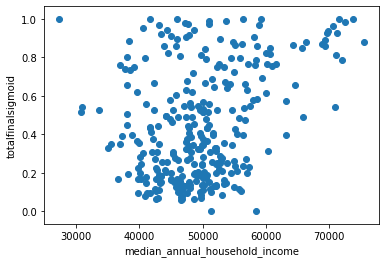

In [260]:
import matplotlib.pyplot as plt
plt.scatter(totalscore['median_annual_household_income'],totalscore['totalfinalsigmoid'])
plt.xlabel("median_annual_household_income")
plt.ylabel("totalfinalsigmoid")
plt.plot()
plt.savefig("median_household_income.png")

In [261]:
reg = np.polyfit(totalscore['avg_monthly_rent'],totalscore['totalfinalsigmoid'],deg = 1)
trent = np.polyval(reg,totalscore['avg_monthly_rent'])

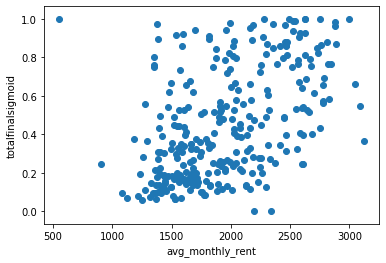

In [262]:
import matplotlib.pyplot as plt
plt.scatter(totalscore['avg_monthly_rent'],totalscore['totalfinalsigmoid'])
plt.xlabel("avg_monthly_rent")
plt.ylabel("totalfinalsigmoid")

plt.savefig("avg_monthly_rent.png")

[]

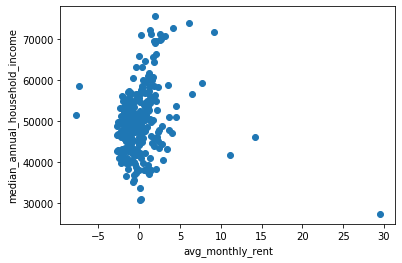

In [263]:
import matplotlib.pyplot as plt
plt.scatter(totalscore['totalfinal'],totalscore['median_annual_household_income'])
plt.xlabel("avg_monthly_rent")
plt.ylabel("median_annual_household_income")
plt.plot()

# Task 3: City of Sydney Analysis

In [264]:
conn.execute("""
drop table if exists free;
create table free(
    lower varchar(50),
    no_of_free integer

)""")
conn.execute("""
drop table if exists notfree;
create table notfree(
    lower varchar(50),
    no_not_free integer

)""")

for extra parking and mobility dataset we need to combine two table together to find out the total

In [265]:
parking_space = query(conn,"""select lower(suburb),count(*) as "no_not_free" 
                                from parkingsyd 
                                group by suburb 
                                order by count(*) desc""")
parking_space

,lower,no_not_free
0,surry hills,245
1,sydney,239
2,pyrmont,171
3,darlinghurst,153
4,ultimo,101
5,glebe,95
6,chippendale,55
7,millers point,53
8,haymarket,53
9,dawes point,38


In [266]:
mobile_parkingspace = query(conn,"""select lower(suburb),count(*) as "no_of_free" 
                                    from parkingsydfree 
                                    group by lower(suburb)""")
mobile_parkingspace

,lower,no_of_free
0,haymarket,7
1,sydney,20
2,forest lodge,4
3,dawes point,5
4,zetland,2
5,woolloomooloo,5
6,pyrmont,5
7,camperdown,5
8,millers point,3
9,eveleigh,1


In [267]:
mobile_parkingspace.to_sql("free",conn, if_exists='append', index=False)
parking_space.to_sql("notfree",conn, if_exists='append', index=False)

create a table to combine all the dataframe together to find out total number of parking space and mobility parking space

In [268]:
finalcount = query(conn,"""select * 
                            from free inner join notfree using(lower) 
                            order by no_not_free desc,no_of_free desc""")
finalcount

,lower,no_of_free,no_not_free
0,surry hills,11,245
1,sydney,20,239
2,pyrmont,5,171
3,darlinghurst,9,153
4,ultimo,7,101
5,glebe,45,95
6,chippendale,2,55
7,haymarket,7,53
8,millers point,3,53
9,dawes point,5,38


normalised each column and sum them up

In [269]:
scaler = StandardScaler()

beforescore = finalcount['no_of_free']
list1 = []
for element in beforescore:
    list2 = [element]
    list1.append(list2)

standardized = scaler.fit_transform(list1)

list4 = []
for element in standardized:
    list4.append(element[0])
finalcount['no_of_free_z'] = list4
beforenotfree= finalcount['no_not_free']

list5 = []
for element in beforenotfree:
    list6 = [element]
    list5.append(list6)
standardizedretail = scaler.fit_transform(list5)
list7 = []
for element in standardizedretail:
    list7.append(element[0])
finalcount['no_not_free_z'] = list7

In [270]:
finalcount['zsum'] = finalcount['no_not_free_z']+finalcount['no_not_free_z']

In [272]:
finalcounttop = finalcount.head()
finalcounttop['zsumsigmoid'] = sigmoid(finalcounttop['zsum'])
finalcounttop

/opt/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lower,no_of_free,no_not_free,no_of_free_z,no_not_free_z,zsum,zsumsigmoid
0,surry hills,11,245,0.059922,2.666793,5.333587,0.995196
1,sydney,20,239,0.853012,2.582579,5.165158,0.994320
2,pyrmont,5,171,-0.468804,1.628148,3.256295,0.962899
3,darlinghurst,9,153,-0.116320,1.375504,2.751008,0.939970
4,ultimo,7,101,-0.292562,0.645645,1.291289,0.784365


Conclusion, in parking perspective surry hill is a best place to live because surry hill got top score in parking

Then combine the parking score to total to access the final liveability score

In [273]:
totalscore
totalscore['area_name'] = totalscore['area_name'].str.lower()
totalscore
namefinal = list(finalcount['lower'])
zfinal = list(finalcount['zsum'])
listtotal = []
for i in range(0,len(zfinal)):
    listtotal.append([namefinal[i],zfinal[i]])

In [274]:
totalscore
totalscorename = list(totalscore['area_name'])
totalscoresum = list(totalscore['totalfinal'])
listscore = []
for i in range(0,len(totalscorename)):
    listscore.append([totalscorename[i],totalscoresum[i]])

for element in listtotal:
    for elements in listscore:
        if element[0] in elements[0]:
            elements[1]+=element[1]

listfinalvalue = []
for i in range(len(listscore)):
    listfinalvalue.append(listscore[i][1])

totalscore['totalfinal1'] = listfinalvalue
totalscore    

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,...,z_scoreschool,sa2_main16,sa2_name16,sa2_main16,count,areavalue,crimescore,totalfinal,totalfinalsigmoid,totalfinal1
3,redfern - chippendale,117031335,2193.0,51347.0,5.599499,5.207925,5.051296,0,-0.161405,-0.254511,...,-0.010111,117031335,Redfern - Chippendale,117031335,2.0,2.096604e-05,7.815291,-7.771251,0.000422,-9.118683
271,surry hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3,1.381244,1.058688,...,0.000000,0,Surry Hills,117031336,2.0,3.446015e-05,12.918425,-7.422768,0.000597,-3.576971
281,lethbridge park - tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-1,-0.902698,-1.101358,...,0.000000,0,Lethbridge Park - Tregear,116031316,6.0,1.721389e-07,-0.048447,-2.770077,0.058963,-2.770077
33,claymore - eagle vale - raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-1,-0.819102,-0.983272,...,-0.119724,123021438,Claymore - Eagle Vale - Raby,123021438,4.0,5.878654e-08,-0.091314,-2.685740,0.063820,-2.685740
230,blue haven - san remo,102021045,1526.0,42641.0,1.143762,0.879817,1.143762,-1,-0.976748,-1.062270,...,0.000000,0,Blue Haven - San Remo,102021045,5.0,2.609488e-08,-0.103677,-2.662368,0.065231,-2.662368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3,1.133769,3.363863,...,0.000000,0,0,0,0.0,0.000000e+00,0.000000,7.683503,0.999540,8.918649
90,north sydney - lavender bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4,1.869983,3.266273,...,0.000000,0,0,0,0.0,0.000000e+00,0.000000,9.148333,0.999894,13.078344
171,chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2,8.545791,0.557540,...,0.000000,0,0,0,0.0,0.000000e+00,0.000000,11.139457,0.999985,11.139457
0,badgerys creek,127011592,553.0,46021.0,0.000000,48.387097,0.000000,-1,7.972828,-1.298707,...,8.593392,127011592,0,0,0.0,0.000000e+00,0.000000,14.233199,0.999999,14.233199


In [275]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
totalscore['totalfinal1sigmoid'] = sigmoid(totalscore['totalfinal1'])
totalscore

,area_name,area_id,avg_monthly_rent,median_annual_household_income,prescore,prescore_retail,prescore_health,accommodationscore,retailscore,healthscore,...,sa2_main16,sa2_name16,sa2_main16,count,areavalue,crimescore,totalfinal,totalfinalsigmoid,totalfinal1,totalfinal1sigmoid
3,redfern - chippendale,117031335,2193.0,51347.0,5.599499,5.207925,5.051296,0,-0.161405,-0.254511,...,117031335,Redfern - Chippendale,117031335,2.0,2.096604e-05,7.815291,-7.771251,0.000422,-9.118683,0.000110
271,surry hills,117031336,2342.0,58396.0,15.223649,13.396811,11.403897,3,1.381244,1.058688,...,0,Surry Hills,117031336,2.0,3.446015e-05,12.918425,-7.422768,0.000597,-3.576971,0.027200
281,lethbridge park - tregear,116031316,1253.0,46525.0,0.818293,1.272901,0.954676,-1,-0.902698,-1.101358,...,0,Lethbridge Park - Tregear,116031316,6.0,1.721389e-07,-0.048447,-2.770077,0.058963,-2.770077,0.058963
33,claymore - eagle vale - raby,123021438,1373.0,48683.0,0.667589,1.716656,1.525917,-1,-0.819102,-0.983272,...,123021438,Claymore - Eagle Vale - Raby,123021438,4.0,5.878654e-08,-0.091314,-2.685740,0.063820,-2.685740,0.063820
230,blue haven - san remo,102021045,1526.0,42641.0,1.143762,0.879817,1.143762,-1,-0.976748,-1.062270,...,0,Blue Haven - San Remo,102021045,5.0,2.609488e-08,-0.103677,-2.662368,0.065231,-2.662368,0.065231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,darlinghurst,117031329,2491.0,59293.0,15.708072,12.083132,22.555180,3,1.133769,3.363863,...,0,0,0,0.0,0.000000e+00,0.000000,7.683503,0.999540,8.918649,0.999866
90,north sydney - lavender bay,121041417,2749.0,71668.0,18.783315,15.991201,22.083087,4,1.869983,3.266273,...,0,0,0,0.0,0.000000e+00,0.000000,9.148333,0.999894,13.078344,0.999998
171,chullora,119011355,2280.0,41625.0,11.428571,51.428571,8.979592,2,8.545791,0.557540,...,0,0,0,0.0,0.000000e+00,0.000000,11.139457,0.999985,11.139457,0.999985
0,badgerys creek,127011592,553.0,46021.0,0.000000,48.387097,0.000000,-1,7.972828,-1.298707,...,127011592,0,0,0.0,0.000000e+00,0.000000,14.233199,0.999999,14.233199,0.999999


Then i create a table called mapdata from the table of total score to visualize our score to map

In [276]:
mapdata = totalscore[['area_name','area_id','totalfinal1sigmoid']]

In [277]:
conn.execute("""
drop table if exists mapping;
create table mapping(
    area_name varchar(50) primary key,
    area_id varchar(9),
    totalfinal1sigmoid numeric)
    
    """)

In [278]:
mapdata.to_sql("mapping",conn,if_exists='append', index=False)

In [279]:
query(conn,"""select * from mapping order by totalfinal1sigmoid desc""")

,area_name,area_id,totalfinal1sigmoid
0,sydney - haymarket - the rocks,117031337,1.000000
1,badgerys creek,127011592,0.999999
2,north sydney - lavender bay,121041417,0.999998
3,chullora,119011355,0.999985
4,darlinghurst,117031329,0.999866
...,...,...,...
294,blue haven - san remo,102021045,0.065231
295,claymore - eagle vale - raby,123021438,0.063820
296,lethbridge park - tregear,116031316,0.058963
297,surry hills,117031336,0.027200


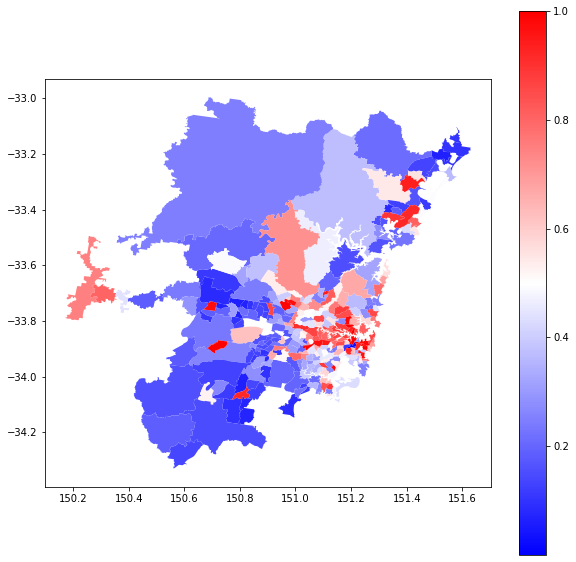

In [280]:
import geopandas as gpd
map_total_info = query(conn,"select * from mapping m inner join sa2 s on (m.area_id = s.sa2_main16)")
city = gpd.read_postgis("""select totalfinal1sigmoid,geom 
                            zfrom mapping m inner join sa2 s on (m.area_id = s.sa2_main16)""",conn)
ax = city.plot(column = "totalfinal1sigmoid",cmap = "bwr",figsize = (10,10),legend = True)
plt.savefig("score_map_of_sydnet.png")

In [ ]:
#conn.close()
#db.dispose()